In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV


In [106]:


class ARIMAModel:
    
    def __init__(self, data):
        self.data = data
        self.model = None
        
    def grid_search(self, p_values, d_values, q_values):
        """
        Finds the optimal ARIMA model parameters using grid search
        
        Parameters:
            - p_values (list): a list of p values to search
            - d_values (list): a list of d values to search
            - q_values (list): a list of q values to search
            
        Returns:
            - best_params (dict): the optimal ARIMA model parameters
        """
        param_grid = {'p': p_values, 'd': d_values, 'q': q_values}
        search = GridSearchCV(ARIMA(self.data, order=(0, 0, 0)), param_grid)
        search.fit(self.data)
        best_params = search.best_params_
        
        return best_params
    
    def fit(self, p, d, q):
        """
        Fits an ARIMA model to the data using the specified parameters
        
        Parameters:
            - p (int): the AR parameter
            - d (int): the differencing parameter
            - q (int): the MA parameter
        """
        self.model = ARIMA(self.data, order=(p, d, q))
        self.model_fit = self.model.fit()
        
    def forecast(self, steps):
        """
        Forecasts future values using the fitted ARIMA model
        
        Parameters:
            - steps (int): the number of steps to forecast
            
        Returns:
            - predictions (array): the forecasted values
        """
        predictions = self.model_fit.forecast(steps=steps)
        return predictions
    
    def plot_forecast(self, steps):
        """
        Plots the forecasted values
        
        Parameters:
            - steps (int): the number of steps to forecast
        """
        predictions = self.forecast(steps)
        plt.plot(self.data)
        plt.plot(predictions, color='red')
        plt.show()


In [133]:
input_dir = './Data/Preparation/merged_typologien.xlsx'
df = pd.read_excel(input_dir)

In [134]:
#rows mit ganzem Kanton luzern löschen
indexNames = df[df['Gemeinde'] == 'Kanton Luzern'].index
df.drop(indexNames , axis=0, inplace=True)
df = df.reset_index()
df.drop('index',  axis=1, inplace=True)
df['Jahr'] = pd.to_datetime(df['Jahr'], format='%Y', errors='ignore')
df.asfreq('Y')
df.head()

,Gemeinde,Gemeinde ID,Mittlere Wohnbevölkerung,Ständige Wohnbevölkerung Total,Ständige Wohnbevölkerung Ausländer-anteil in %,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Ständige Wohnbevölkerung Anteil 0-19-Jährige in %,Ständige Wohnbevölkerung Anteil 20-64-Jährige in %,Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %,Jahr,Gemeindetypologien
0,Adligenswil,1051.0,4330,4356,6.6,623.2,34.6,61.8,3.6,1991-01-01,Agglokern
1,Aesch,1021.0,896,912,6.6,157.2,29.5,61.3,9.2,1991-01-01,Land
2,Alberswil,1121.0,432,428,8.2,121.1,26.2,64.0,9.8,1991-01-01,Land
3,Altbüron,1122.0,739,749,4.1,111.0,29.1,59.5,11.3,1991-01-01,Land
4,Altishofen,1123.0,1541,1515,10.6,105.8,30.4,58.5,11.1,1991-01-01,Land


In [135]:
#Kategrien erstellen
# Kodieren der kategorialen Variable mit get_dummies() von Pandas
df = pd.get_dummies(df, columns=['Gemeindetypologien'],prefix='', prefix_sep='')
df = df.drop(['Gemeinde'],axis=1)
df.head()

,Gemeinde ID,Mittlere Wohnbevölkerung,Ständige Wohnbevölkerung Total,Ständige Wohnbevölkerung Ausländer-anteil in %,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Ständige Wohnbevölkerung Anteil 0-19-Jährige in %,Ständige Wohnbevölkerung Anteil 20-64-Jährige in %,Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %,Jahr,Aggloguertel,Agglokern,Kern,Land,Stadt
0,1051.0,4330,4356,6.6,623.2,34.6,61.8,3.6,1991-01-01,0,1,0,0,0
1,1021.0,896,912,6.6,157.2,29.5,61.3,9.2,1991-01-01,0,0,0,1,0
2,1121.0,432,428,8.2,121.1,26.2,64.0,9.8,1991-01-01,0,0,0,1,0
3,1122.0,739,749,4.1,111.0,29.1,59.5,11.3,1991-01-01,0,0,0,1,0
4,1123.0,1541,1515,10.6,105.8,30.4,58.5,11.1,1991-01-01,0,0,0,1,0


In [136]:
df.set_index(['Gemeinde ID','Jahr'], inplace= True)
df = df.sort_index()

In [121]:
df.head(10)

Mittlere Wohnbevölkerung  \
Gemeinde ID Jahr                                   
1001.0      1991-01-01                       562   
            1992-01-01                       585   
            1993-01-01                       611   
            1994-01-01                       613   
            1995-01-01                       643   
            1996-01-01                       653   
            1997-01-01                       648   
            1998-01-01                       641   
            1999-01-01                       661   
            2000-01-01                       669   

                        Ständige Wohnbevölkerung Total  \
Gemeinde ID Jahr                                         
1001.0      1991-01-01                             575   
            1992-01-01                             596   
            1993-01-01                             603   
            1994-01-01                             630   
            1995-01-01                             655   
            1996-01-01                             650   
            1997-01-01                             641   
            1998-01-01                             664   
            1999-01-01                             665   
            2000-01-01                             676   

                       Ständige Wohnbevölkerung Ausländer-anteil in %  \
Gemeinde ID Jahr                                                        
1001.0      1991-01-01                                            0.3   
            1992-01-01                                            0.2   
            1993-01-01                                            0.3   
            1994-01-01                                            1.9   
            1995-01-01                                            3.1   
            1996-01-01                                            2.3   
            1997-01-01                                            2.5   
            1998-01-01                                            2.1   
            1999-01-01                                            2.1   
            2000-01-01                                            2.2   

                        Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2  \
Gemeinde ID Jahr                                                                     
1001.0      1991-01-01                                               82.8            
            1992-01-01                                               85.8            
            1993-01-01                                               86.8            
            1994-01-01                                               90.7            
            1995-01-01                                               94.3            
            1996-01-01                                               93.6            
            1997-01-01                                               92.3            
            1998-01-01                                               95.6            
            1999-01-01                                               95.8            
            2000-01-01                                               97.3            

                        Ständige Wohnbevölkerung Anteil 0-19-Jährige in %  \
Gemeinde ID Jahr                                                            
1001.0      1991-01-01                                               32.9   
            1992-01-01                                               32.4   
            1993-01-01                                               32.7   
            1994-01-01                                               32.2   
            1995-01-01                                               32.4   
            1996-01-01                                               31.7   
            1997-01-01                                               31.5   
            1998-01-01                                               31.9   
            1999-01-01

In [189]:
from sklearn.base import BaseEstimator, RegressorMixin
from statsmodels.tsa.arima.model import ARIMA

class ARIMAGridSearch(BaseEstimator, RegressorMixin):
    def __init__(self, p_values=[0, 1, 2, 3], d_values=[0, 1, 2, 3], q_values=[0, 1, 2, 3]):
        self.p_values = p_values
        self.d_values = d_values
        self.q_values = q_values
    
    def fit(self, X, y=None):
        best_score = float('-inf')
        best_params = None
        
        for p in self.p_values:
            for d in self.d_values:
                for q in self.q_values:
                    try:
                        
                        model = ARIMA(X, order=(p, d, q))
                        results = model.fit()
                        score = results.aic
                        
                        
                        if score > best_score:
                            best_score = score
                            best_params = {'p': p, 'd': d, 'q': q}
                            
                    except:
                        continue
        
        self.best_params_ = best_params
        self.model_ = ARIMA(X, order=(best_params['p'], best_params['d'], best_params['q'])).fit()
    
    def predict(self, X):
        return self.model_.predict(start=X.index[0], end=X.index[-1])
    
    def get_params(self, deep=True):
        return {
            'p_values': self.p_values,
            'd_values': self.d_values,
            'q_values': self.q_values
        }
    
    def set_params(self, **params):
        self.p_values = params['p_values']
        self.d_values = params['d_values']
        self.q_values = params['q_values']        
        return self    

    def forecast(self, steps):
        """
        Forecasts future values using the fitted ARIMA model
        
        Parameters:
            - steps (int): the number of steps to forecast
            
        Returns:
            - predictions (array): the forecasted values
        """
        predictions = self.model_.forecast(steps=steps)
        return predictions
    
    def plot_forecast(self, steps):
        """
        Plots the forecasted values
        
        Parameters:
            - steps (int): the number of steps to forecast
        """
        predictions = self.forecast(steps)
        plt.plot()
        plt.plot(predictions, color='red')
        plt.show()

In [192]:
data = df.loc[1001]
data = data['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
data = data.to_frame()
data.index = pd.DatetimeIndex(data.index.values,
                               freq=data.index.inferred_freq)
data


,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2
1991-01-01,82.8
1992-01-01,85.8
1993-01-01,86.8
1994-01-01,90.7
1995-01-01,94.3
1996-01-01,93.6
1997-01-01,92.3
1998-01-01,95.6
1999-01-01,95.8
2000-01-01,97.3


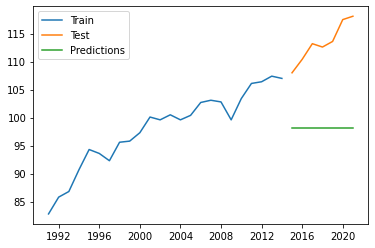

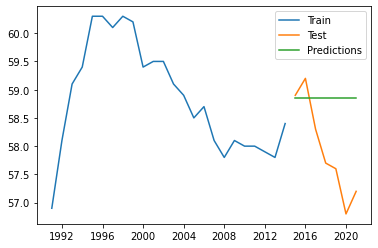

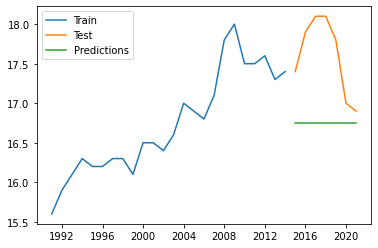

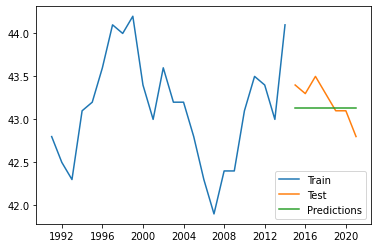

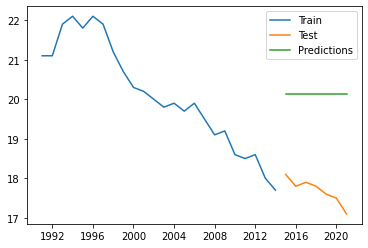

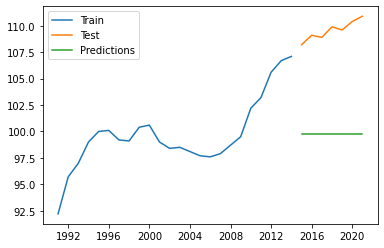

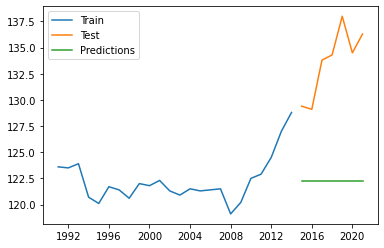

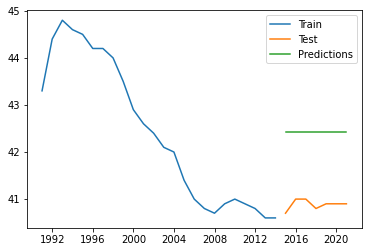

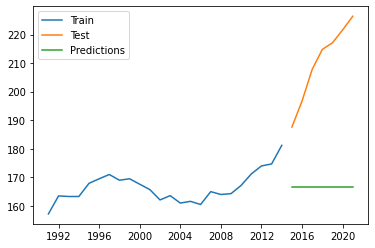

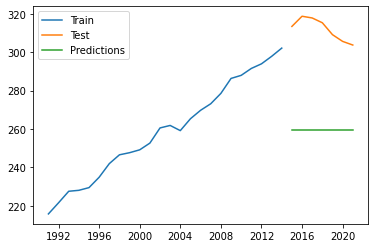

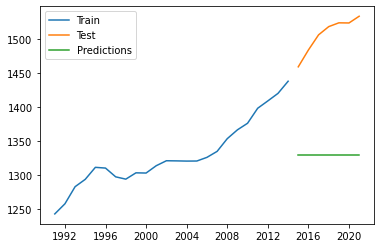

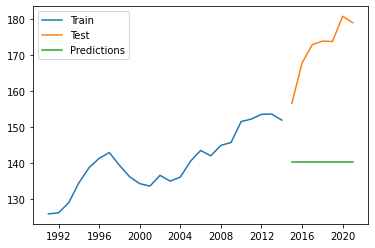

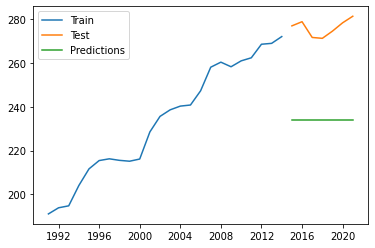

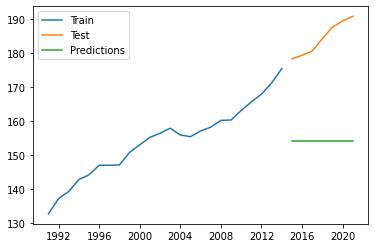

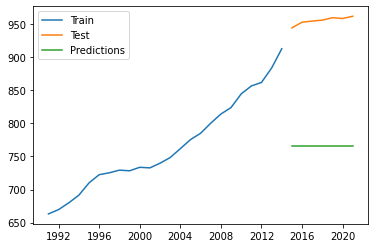

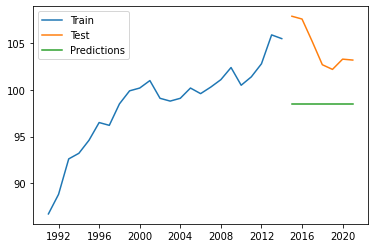

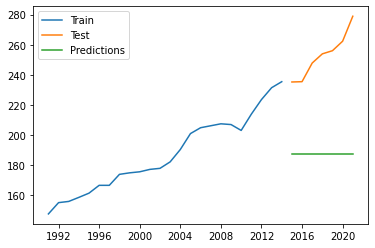

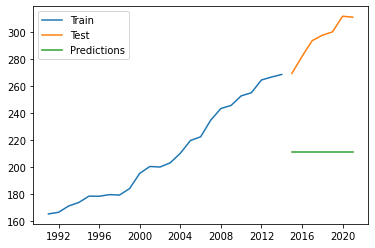

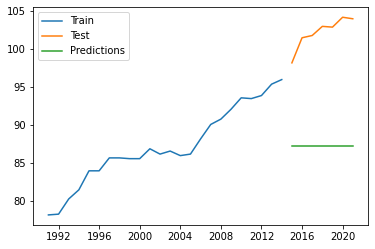

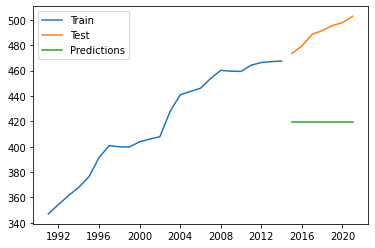

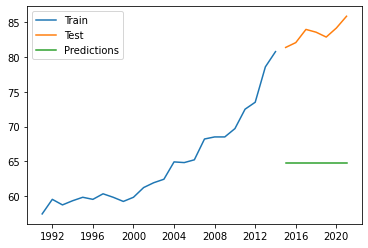

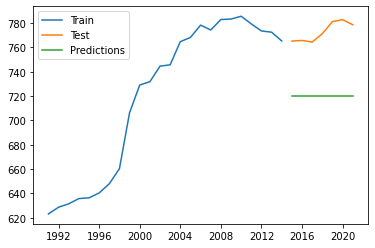

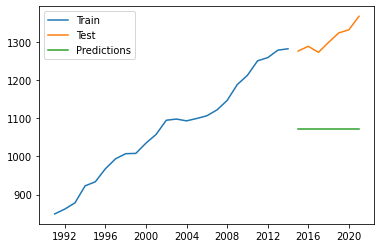

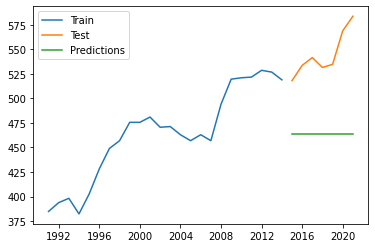

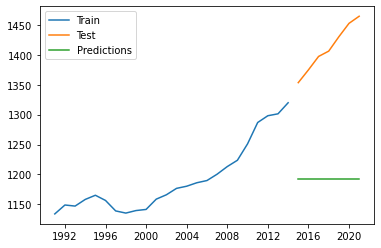

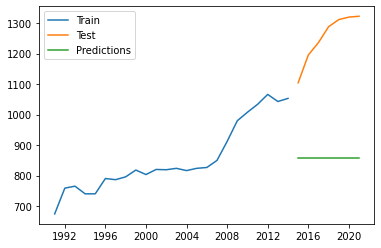

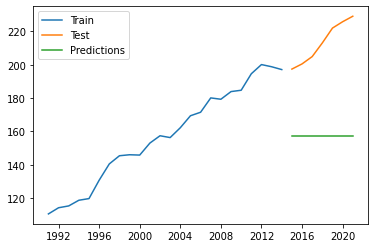

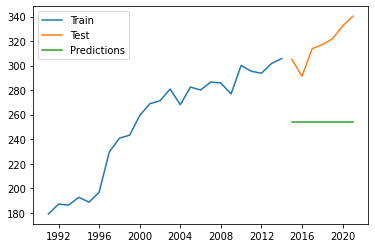

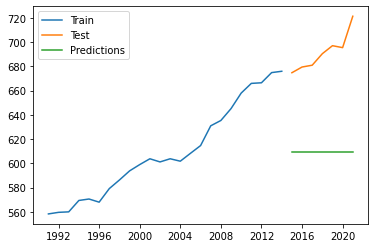

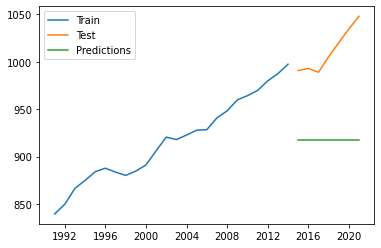

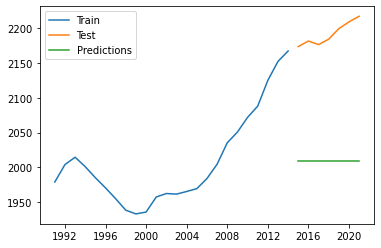

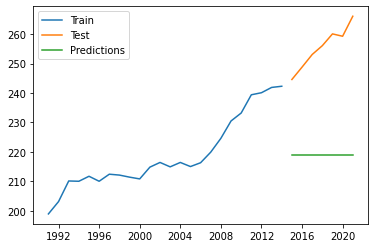

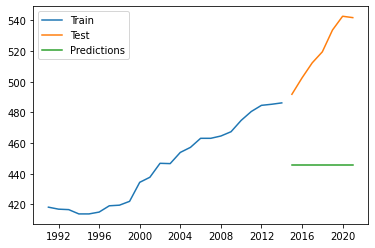

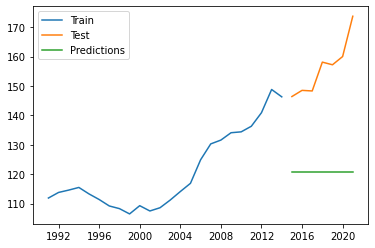

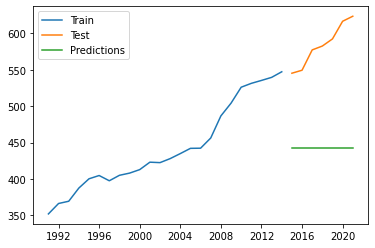

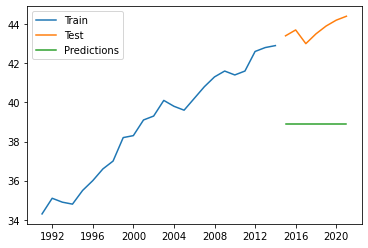

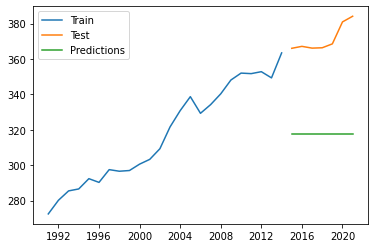

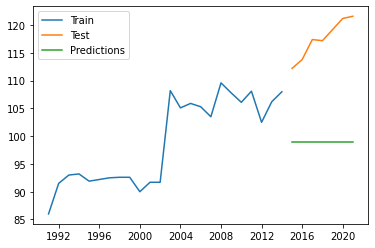

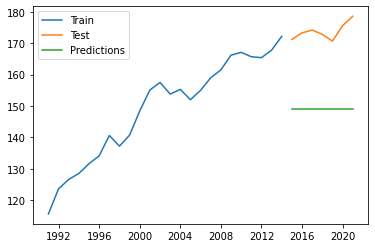

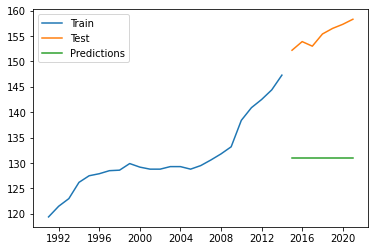

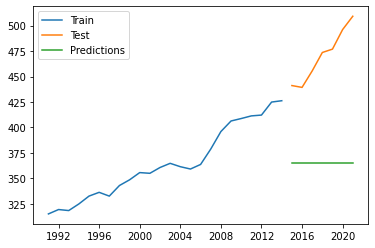

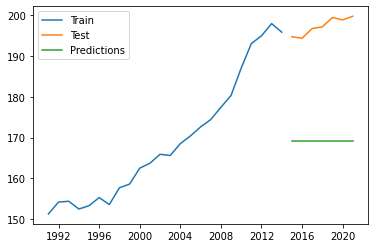

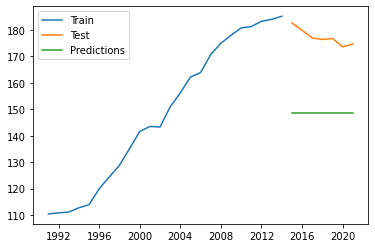

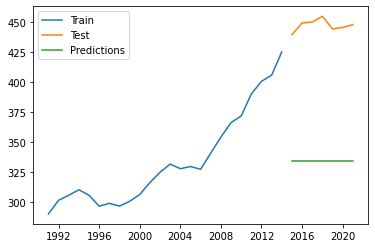

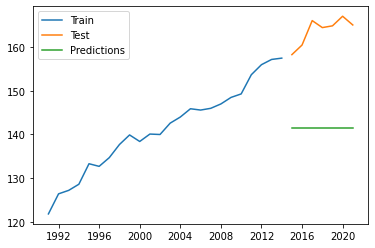

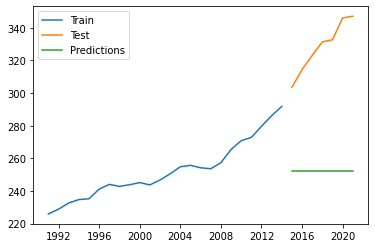

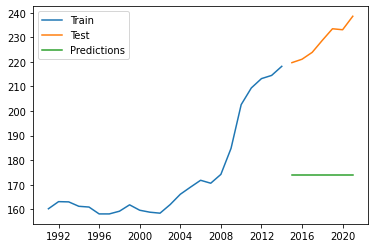

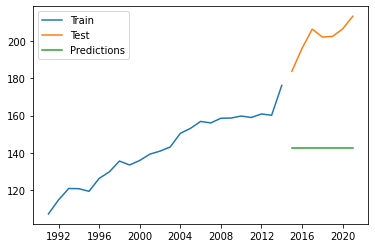

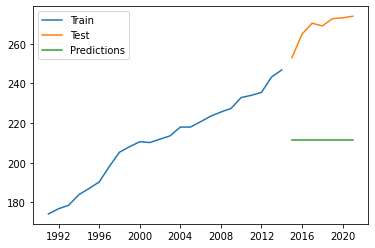

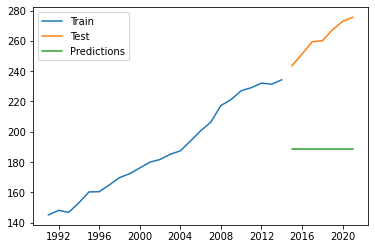

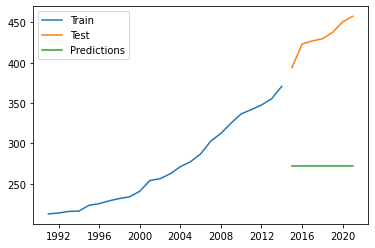

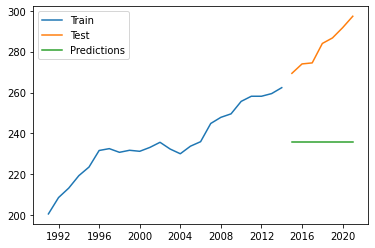

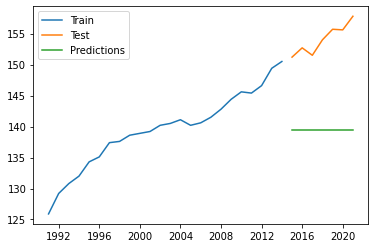

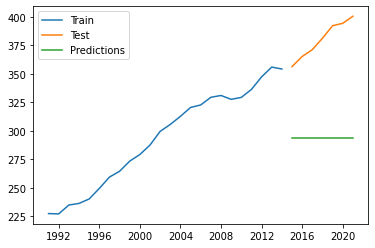

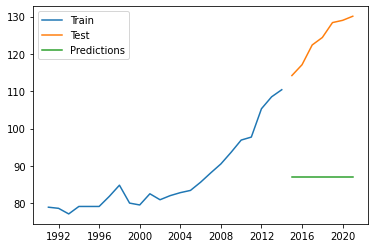

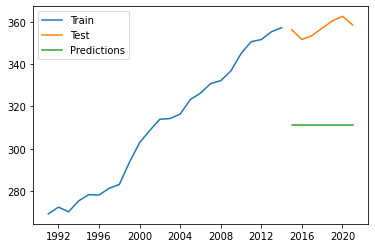

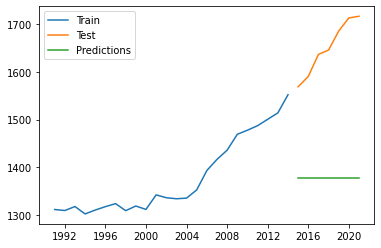

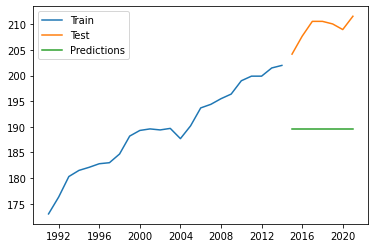

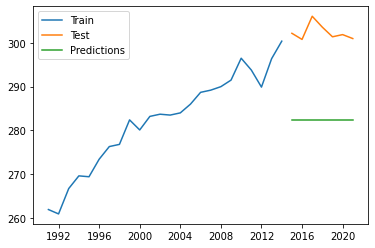

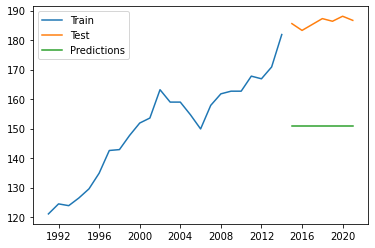

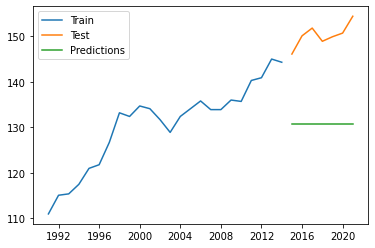

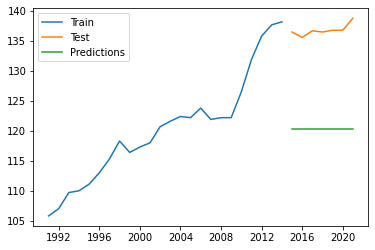

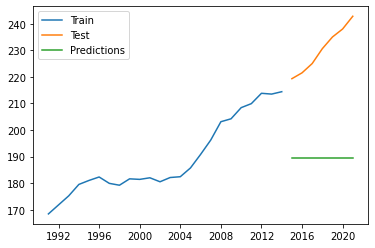

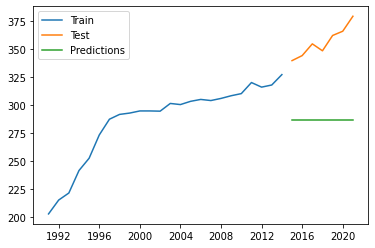

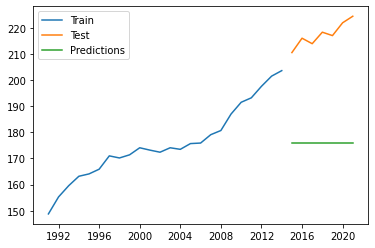

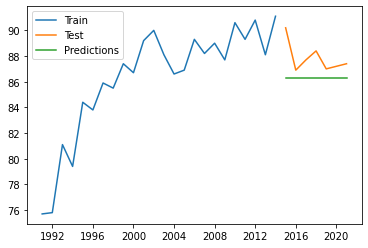

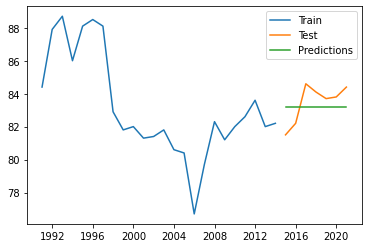

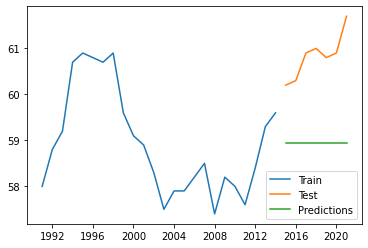

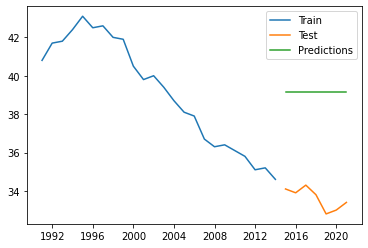

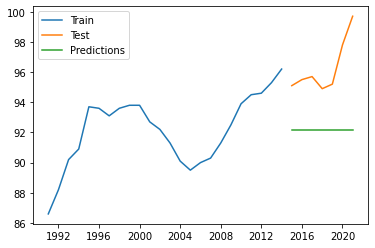

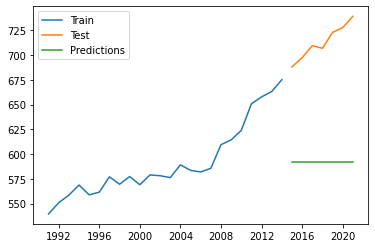

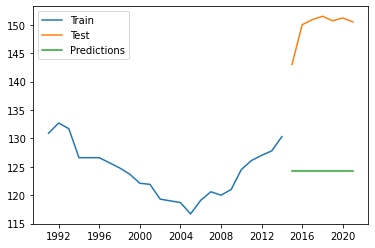

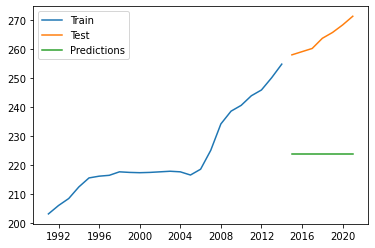

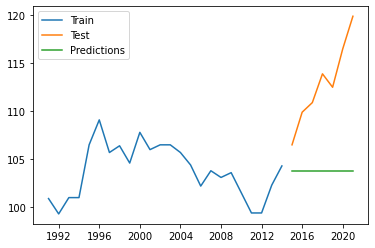

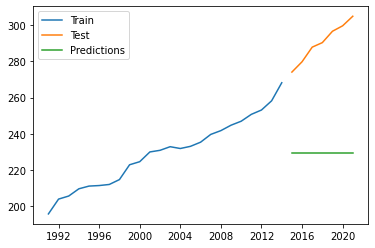

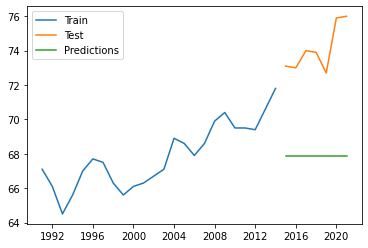

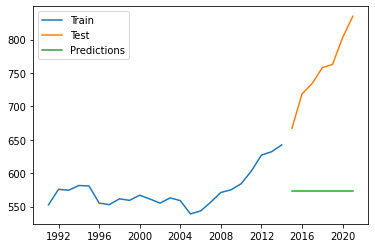

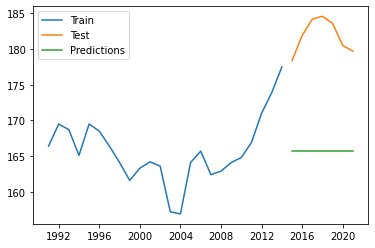

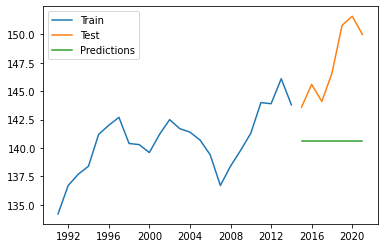

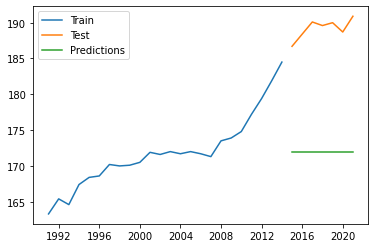

In [201]:

values = [x for x in range(0,3)]
for ids in df.index.get_level_values(0).unique():
    
    data = df.loc[ids]
    data = data['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
    data = data.to_frame()
    data.index = pd.DatetimeIndex(data.index.values,
                                freq=data.index.inferred_freq)




    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    # Train the ARIMA model using grid search
    model = ARIMAGridSearch(values,values,values)
    model.fit(train)

    # Make predictions on the test set
    preds = model.predict(test)

    # Plot the results
    plt.plot(train.index, train.values, label='Train')
    plt.plot(test.index, test.values, label='Test')
    plt.plot(preds.index, preds.values, label='Predictions')
    plt.legend()
    plt.show()

    if ids == 1008:
        break

In [193]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# instantiate the grid search object
arima_grid = ARIMAGridSearch()

# fit the model to the data
arima_grid.fit(data)

# make predictions
predictions = arima_grid.predict(data)

#print the best parameters found by the grid search
print(arima_grid.best_params_)
arima_grid.forecast(5)

{'p': 0, 'd': 0, 'q': 0}


2018-01-01    99.455551
2019-01-01    99.455551
2020-01-01    99.455551
2021-01-01    99.455551
2022-01-01    99.455551
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [220]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Erstellen Sie einen simulierten Zeitreihendatensatz mit zwei exogenen Variablen
np.random.seed(123)
y = pd.Series(np.random.randn(1000).cumsum(), index=pd.date_range('20210101', periods=1000))
x1 = pd.Series(np.random.randn(1000), index=pd.date_range('20210101', periods=1000))
x2 = pd.Series(np.random.randn(1000), index=pd.date_range('20210101', periods=1000))

# Teilen Sie die Daten in Trainings- und Testsets auf
train_size = int(len(y) * 0.8)
train_y, test_y = y[:train_size], y[train_size:]
train_x1, test_x1 = x1[:train_size], x1[train_size:]
train_x2, test_x2 = x2[:train_size], x2[train_size:]

# Definieren Sie die Parameter für die Grid Search
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
x_vars = [train_x1, train_x2]

# Führen Sie die Grid Search durch, um die besten Parameter zu finden
best_score = float('-inf')
best_params = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            print(p,d,q)
            try:
                print(p,d,q)
                model = ARIMA(train_y, order=(p, d, q))
                #print(model)
                results = model.fit()
                #print(results)
                score = results.aic
                print(score)
                if score > best_score:
                    best_score = score
                    best_params = {'p': p, 'd': d, 'q': q}

            except:
                continue

# Trainieren Sie das ARIMAX-Modell mit den besten gefundenen Parametern
print(x_vars)
model = ARIMA(train_y,  order=(best_params['p'], best_params['d'], best_params['q'])).fit() #exog=x_vars,

# Erstellen Sie Vorhersagen für das Testset
test_x_vars = [test_x1, test_x2]
predictions = model.predict(start=test_y.index[0], end=test_y.index[-1]) #exog=test_x_vars

# Evaluieren Sie die Vorhersagegenauigkeit mit einer Metrik wie dem Mean Squared Error
mse = ((predictions - test_y) ** 2).mean()
print('MSE: ', mse)

0 0 0
0 0 0
5902.4120869492635
0 0 1
0 0 1
0 0 2
0 0 2
0 1 0
0 1 0
2285.102243022997
0 1 1
0 1 1
2286.5606104673775
0 1 2
0 1 2
2288.557807605298
1 0 0
1 0 0
2293.9800254642355
1 0 1
1 0 1
2295.3176317165867
1 0 2
1 0 2
2297.300778944199
1 1 0
1 1 0
2286.5583081860764
1 1 1
1 1 1
2288.2792937307745
1 1 2
1 1 2
2 0 0
2 0 0
2295.310833695451
2 0 1
2 0 1
2296.800227324448
2 0 2
2 0 2
2 1 0
2 1 0
2288.553910271291
2 1 1
2 1 1
2 1 2
2 1 2
[2021-01-01   -0.748827
2021-01-02    0.567595
2021-01-03    0.718151
2021-01-04   -0.999381
2021-01-05    0.474898
                ...   
2023-03-07   -0.003155
2023-03-08   -0.430660
2023-03-09   -0.146416
2023-03-10    1.160176
2023-03-11   -0.641512
Freq: D, Length: 800, dtype: float64, 2021-01-01   -1.774224
2021-01-02   -1.201377
2021-01-03    1.096257
2021-01-04    0.861037
2021-01-05   -1.520367
                ...   
2023-03-07    0.792809
2023-03-08   -2.030271
2023-03-09   -1.880218
2023-03-10   -1.469470
2023-03-11   -0.592608
Freq: D, Length: 